# Dataset Link

Dataset

Hint:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA, ARMAResults

import datetime

import sys

import seaborn as sns

import statsmodels

import statsmodels.stats.diagnostic as diag

from statsmodels.tsa.stattools import adfuller

from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr

plt.style.use('fivethirtyeight')

%matplotlib inline

df = pd.read_csv('C:/Users/Downloads/sp500/data_stocks.csv')

df.head()

# Problem Statement:

Pick up the following stocks and generate forecasts accordingly

Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Loading Data

In [2]:
#Read CSV (comma-separated) file into DataFrame
df = pd.read_csv('data_stocks.csv')

# Data Exploration/Analysis

In [3]:
#Returns the first 5 rows of df dataframe
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.describe() #The summary statistics of the df dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [5]:
df.info() #Prints information about df DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [6]:
df.columns #Columns of df dataframe

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [7]:
df.shape #Return a tuple representing the dimensionality of df DataFrame.

(41266, 502)

In [8]:
df.isnull().values.any() #Check for any NA’s in the dataframe.

False

# 1. NASDAQ.AAPL

In [9]:
df_1 = df.copy() #Makes a copy of df dataframe.

In [10]:
#Creating a column 'AAPL_LOG' with the log values of 'NASDAQ.AAPL' column data
df_1["AAPL_LOG"] = df_1["NASDAQ.AAPL"].apply(lambda x:np.log(x))

In [11]:
df_1.head() #Returns the first 5 rows of df_1 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,AAPL_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449


In [12]:
type(df_1["DATE"][0]) #Type of the 'DATE' column

numpy.int64

In [13]:
#Creating a new column 'DATE_NEW' with formatted timestamp 
df_1["DATE_NEW"] = df_1["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [14]:
df_1.head() #Returns the first 5 rows of df_1 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,AAPL_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 19:04:00


In [15]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df_1["AAPL_LOG"]))

Durbin-Watson statistic: 1.5195875753588083e-08


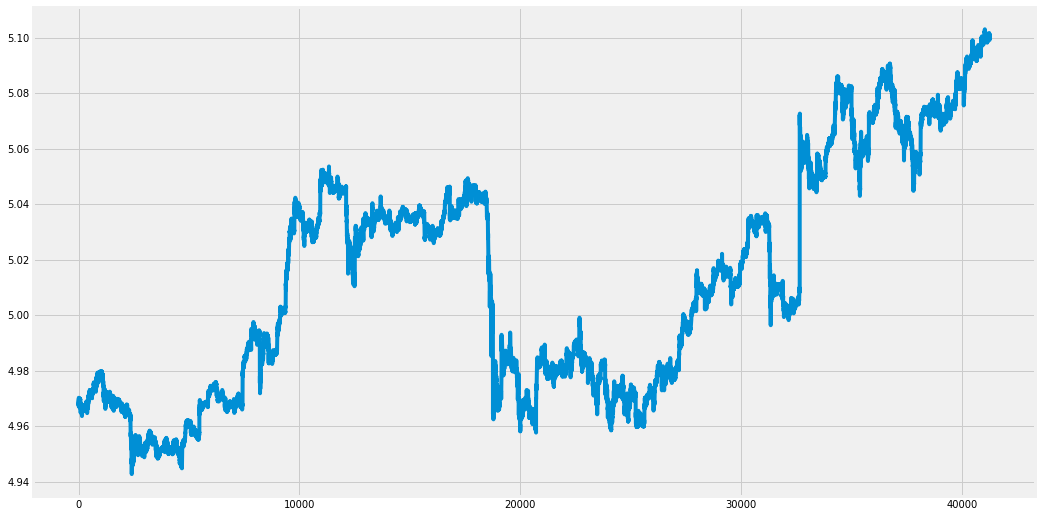

In [16]:
#Series Plot
df_1["AAPL_LOG"].plot(figsize=(16,9))
plt.show()

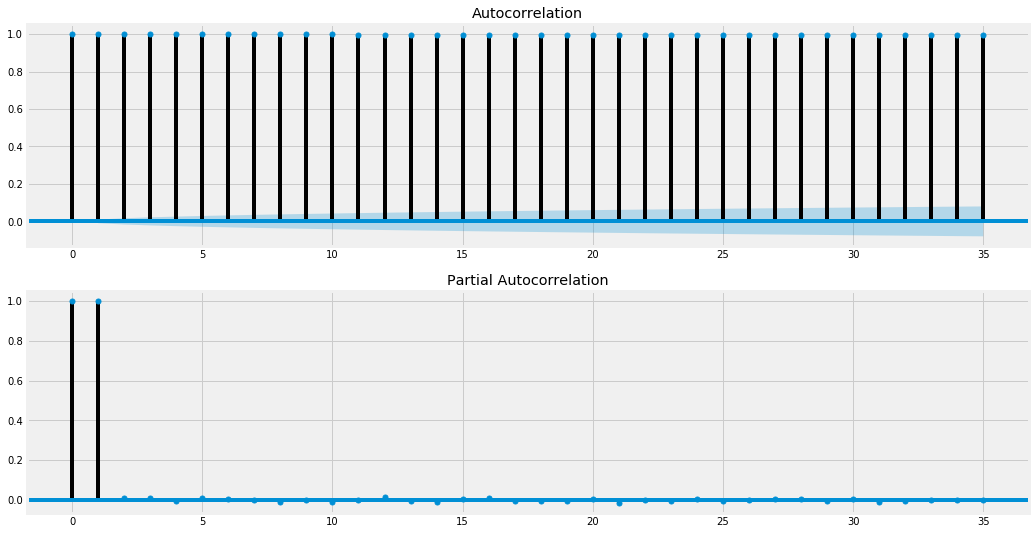

In [17]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_1["AAPL_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_1["AAPL_LOG"], lags=35, ax=ax2)

In [18]:
#Getting the 'AAPL_LOG' column values as array with dropping NaN values
array_1 = (df_1["AAPL_LOG"].dropna().as_matrix())

In [19]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'AAPL_LOG' column current row and previous row
df_1["AAPL_LOG_DIFF"] = df_1["AAPL_LOG"] - df_1["AAPL_LOG"].shift(periods=-1)

In [20]:
#Creating ARMA Model
model_1 = sm.tsa.ARMA(array_1,(2,0)).fit()
print(model_1.params) #Prints model parameter

[5.02084309 0.99073673 0.0091853 ]


In [21]:
#Printing Model's AIC, BIC and HQIC values
print(model_1.aic, model_1.bic, model_1.hqic)

-492715.64021670975 -492681.1290399284 -492704.73243540316


In [22]:
#Finding the best values for ARIMA model parameter
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array_1,(p,q,r)).fit()
                if(aic > model_1.aic):
                    aic = model_1.aic
                    a,b,c = p,q,r
            except:
                pass
                
print(a,b,c)

C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0


C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
#Creating and fitting ARIMA model
model_1_arima = ARIMA(array_1,(0, 1, 0)).fit()

In [24]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model_1_arima.resid))

Durbin-Watson statistic: 2.01849625374405


In [25]:
#Predicting the values using ARIMA Model
pred_1 = model_1_arima.predict()
pred_1

array([3.2025837e-06, 3.2025837e-06, 3.2025837e-06, ..., 3.2025837e-06,
       3.2025837e-06, 3.2025837e-06])

# Root Mean Squared Error

In [26]:
#Printing RMSE value for the model
print(np.sqrt(mean_squared_error(pred_1,df_1["AAPL_LOG_DIFF"][:-1])))

0.0006179891020649635


# 2. NASDAQ.ADP

In [27]:
df_2 = df.copy() #Makes a copy of df dataframe.

In [28]:
#Creating a column 'ADP_LOG' with the log values of 'NASDAQ.ADP' column data
df_2["ADP_LOG"] = df_2["NASDAQ.ADP"].apply(lambda x:np.log(x))

In [29]:
df_2.head() #Returns the first 5 rows of df_2 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,ADP_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.627225
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.626344
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.627054
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.626344
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.625561


In [30]:
type(df_2["DATE"][0]) #Type of the 'DATE' column

numpy.int64

In [31]:
#Creating a new column 'DATE_NEW' with formatted timestamp 
df_2["DATE_NEW"] = df_2["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [32]:
df_2.head() #Returns the first 5 rows of df_2 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,ADP_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.627225,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.626344,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.627054,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.626344,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.625561,2017-04-03 19:04:00


In [33]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df_2["ADP_LOG"]))

Durbin-Watson statistic: 2.270798861744159e-08


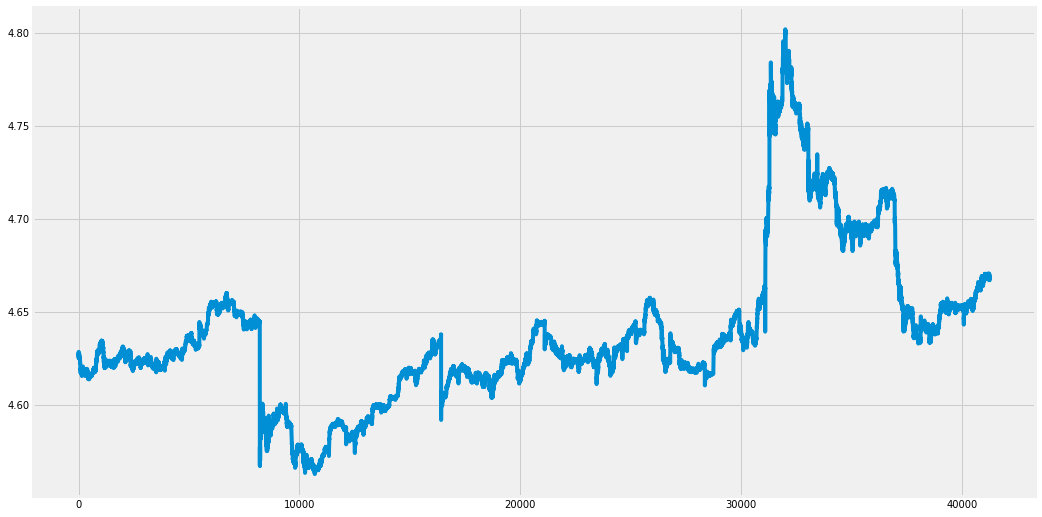

In [34]:
#Series Plot
df_2["ADP_LOG"].plot(figsize=(16,9))
plt.show()

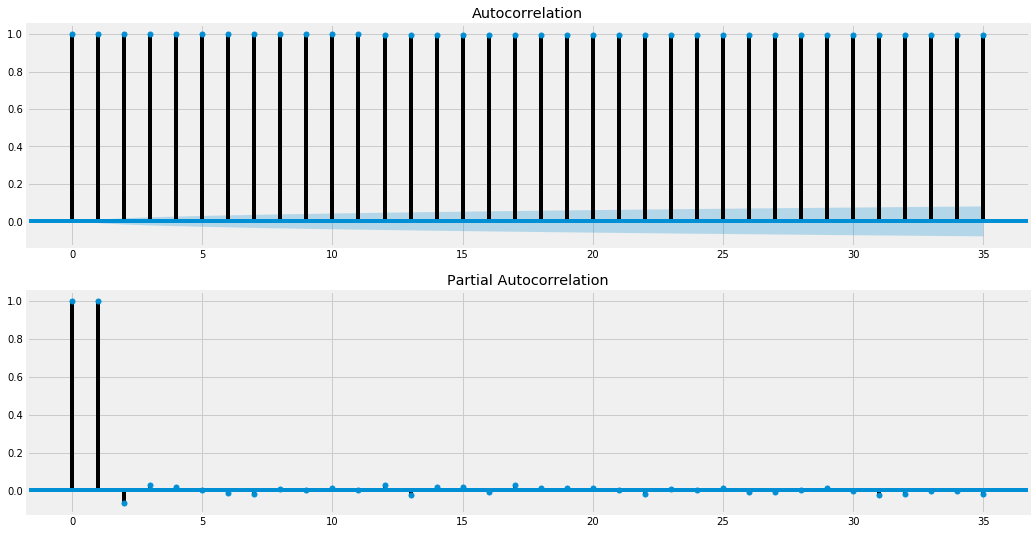

In [35]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_2["ADP_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_2["ADP_LOG"], lags=35, ax=ax2)

In [36]:
#Getting the 'ADP_LOG' column values as array with dropping NaN values
array_2 = (df_2["ADP_LOG"].dropna().as_matrix())

In [37]:
#Creating a column 'ADP_LOG_DIFF' with data as difference of 'ADP_LOG' column current row and previous row
df_2["ADP_LOG_DIFF"] = df_2["ADP_LOG"] - df_2["ADP_LOG"].shift(periods=-1)

In [38]:
#Creating ARMA Model
model_2 = sm.tsa.ARMA(array_2,(2,0)).fit()
print(model_2.params) #Prints model parameter

[ 4.64047721  1.05961548 -0.0597795 ]


In [39]:
#Printing Model's AIC, BIC and HQIC values
print(model_2.aic, model_2.bic, model_2.hqic)

-482690.9495346235 -482656.4383578421 -482680.0417533169


In [40]:
#Finding the best values for ARIMA model parameter
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array_2,(p,q,r)).fit()
                if(aic > model_2.aic):
                    aic = model_2.aic
                    a,b,c = p,q,r
            except:
                pass
                
print(a,b,c)

C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0


In [41]:
#Creating and fitting ARIMA model
model_2_arima = ARIMA(array_2,(0, 1, 0)).fit()

In [42]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model_2_arima.resid))

Durbin-Watson statistic: 1.8805348562321806


In [43]:
#Predicting the values using ARIMA Model
pred_2 = model_2_arima.predict()
pred_2

array([9.84773475e-07, 9.84773475e-07, 9.84773475e-07, ...,
       9.84773475e-07, 9.84773475e-07, 9.84773475e-07])

# Root Mean Squared Error

In [44]:
#Printing RMSE value for the model
print(np.sqrt(mean_squared_error(pred_2,df_2["ADP_LOG_DIFF"][:-1])))

0.0006990223369080944


# 3. NASDAQ.CBOE

In [45]:
df_3 = df.copy() #Makes a copy of df dataframe.

In [46]:
#Creating a column 'CBOE_LOG' with the log values of 'NASDAQ.CBOE' column data
df_3["CBOE_LOG"] = df_3["NASDAQ.CBOE"].apply(lambda x:np.log(x))

In [47]:
df_3.head() #Returns the first 5 rows of df_3 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CBOE_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.394819
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.397038
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.397038
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.396053
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.395930


In [48]:
type(df_3["DATE"][0]) #Type of the 'DATE' column

numpy.int64

In [49]:
#Creating a new column 'DATE_NEW' with formatted timestamp 
df_3["DATE_NEW"] = df_3["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [50]:
df_3.head() #Returns the first 5 rows of df_3 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CBOE_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.394819,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.397038,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.397038,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.396053,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.395930,2017-04-03 19:04:00


In [51]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df_3["CBOE_LOG"]))

Durbin-Watson statistic: 1.3696573056329881e-08


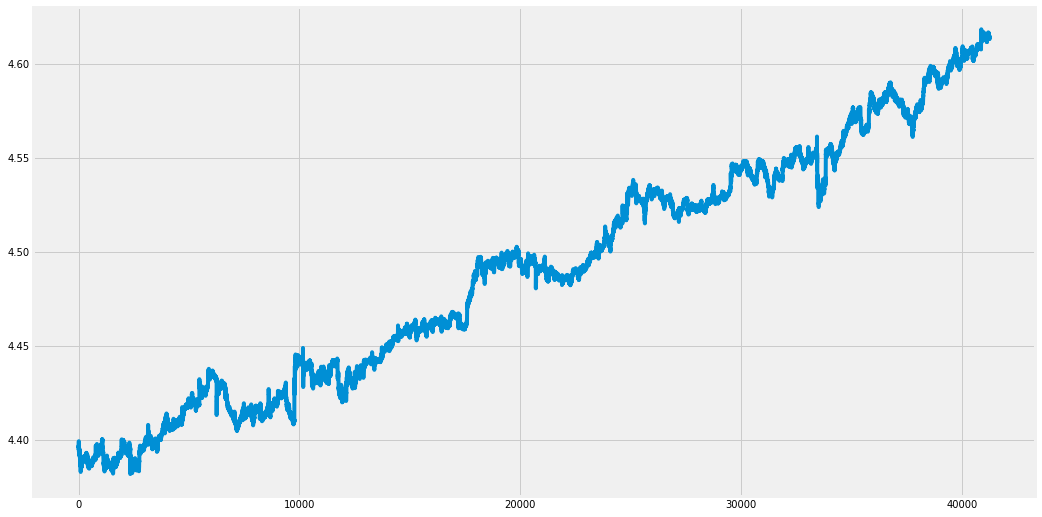

In [52]:
#Series Plot
df_3["CBOE_LOG"].plot(figsize=(16,9))
plt.show()

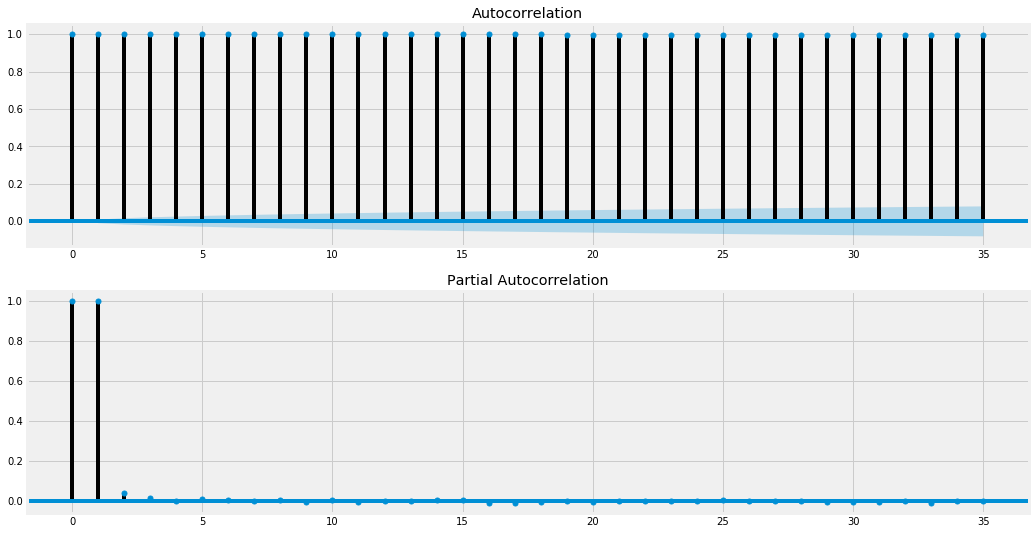

In [53]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_3["CBOE_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_3["CBOE_LOG"], lags=35, ax=ax2)

In [54]:
#Getting the 'CBOE_LOG' column values as array with dropping NaN values
array_3 = (df_3["CBOE_LOG"].dropna().as_matrix())

In [55]:
#Creating a column 'CBOE_LOG_DIFF' with data as difference of 'CBOE_LOG' column current row and previous row 
df_3["CBOE_LOG_DIFF"] = df_3["CBOE_LOG"] - df_3["CBOE_LOG"].shift(periods=-1)

In [56]:
#Creating ARMA Model
model_3 = sm.tsa.ARMA(array_3,(2,0)).fit()
print(model_3.params) #Prints model parameter

[4.50153461 0.92316493 0.0768214 ]


In [57]:
#Printing Model's AIC, BIC and HQIC values
print(model_3.aic, model_3.bic, model_3.hqic)

-506320.74213214085 -506286.23095535947 -506309.83435083425


In [58]:
#Finding the best values for ARIMA model parameter
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array_3,(p,q,r)).fit()
                if(aic > model_3.aic):
                    aic = model_3.aic
                    a,b,c = p,q,r
            except:
                pass
                
print(a,b,c)

C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0


In [59]:
#Creating and fitting ARIMA model
model_3_arima = ARIMA(array_3,(0, 1, 0)).fit()

In [60]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model_3_arima.resid))

Durbin-Watson statistic: 2.153351702869302


In [64]:
#Predicting the values using ARIMA Model
pred_3 = model_3_arima.predict()
pred_3

array([5.31228169e-06, 5.31228169e-06, 5.31228169e-06, ...,
       5.31228169e-06, 5.31228169e-06, 5.31228169e-06])

# Root Mean Squared Error

In [65]:
#Printing RMSE value for the model
print(np.sqrt(mean_squared_error(pred_3,df_3["CBOE_LOG_DIFF"][:-1])))

0.0005256421964115259


# 4. NASDAQ.CSCO

In [66]:
df_4 = df.copy() #Makes a copy of df dataframe.

In [67]:
#Creating a column 'CSCO_LOG' with the log values of 'NASDAQ.CSCO' column data
df_4["CSCO_LOG"] = df_4["NASDAQ.CSCO"].apply(lambda x:np.log(x))

In [68]:
df_4.head() #Returns the first 5 rows of df_4 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CSCO_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.518684
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.522825
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.523415
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.521936
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.521644


In [69]:
type(df_4["DATE"][0]) #Type of the 'DATE' column

numpy.int64

In [70]:
#Creating a new column 'DATE_NEW' with formatted timestamp 
df_4["DATE_NEW"] = df_4["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [71]:
df_4.head() #Returns the first 5 rows of df_4 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CSCO_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.518684,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.522825,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.523415,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.521936,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.521644,2017-04-03 19:04:00


In [72]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df_4["CSCO_LOG"]))

Durbin-Watson statistic: 3.654769389312727e-08


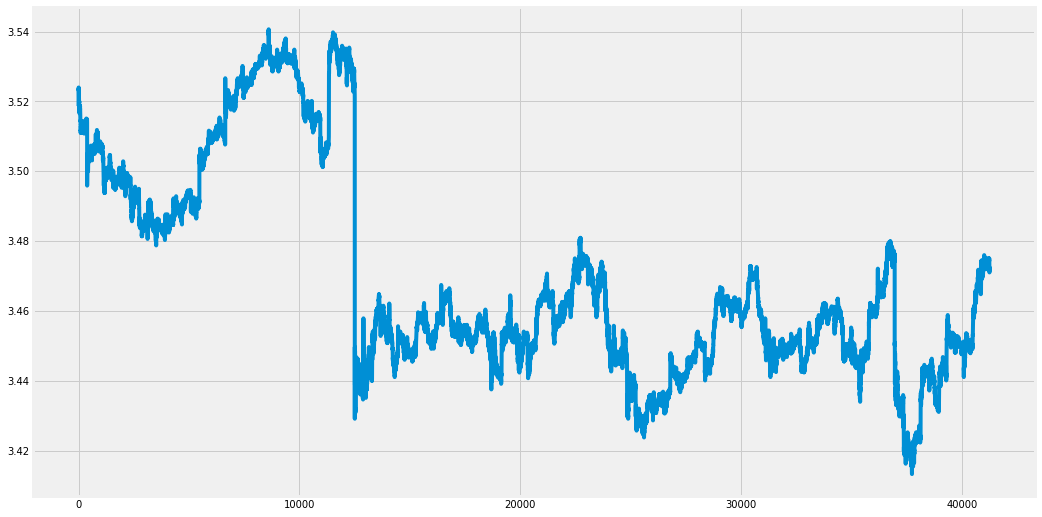

In [73]:
#Series Plot
df_4["CSCO_LOG"].plot(figsize=(16,9))
plt.show()

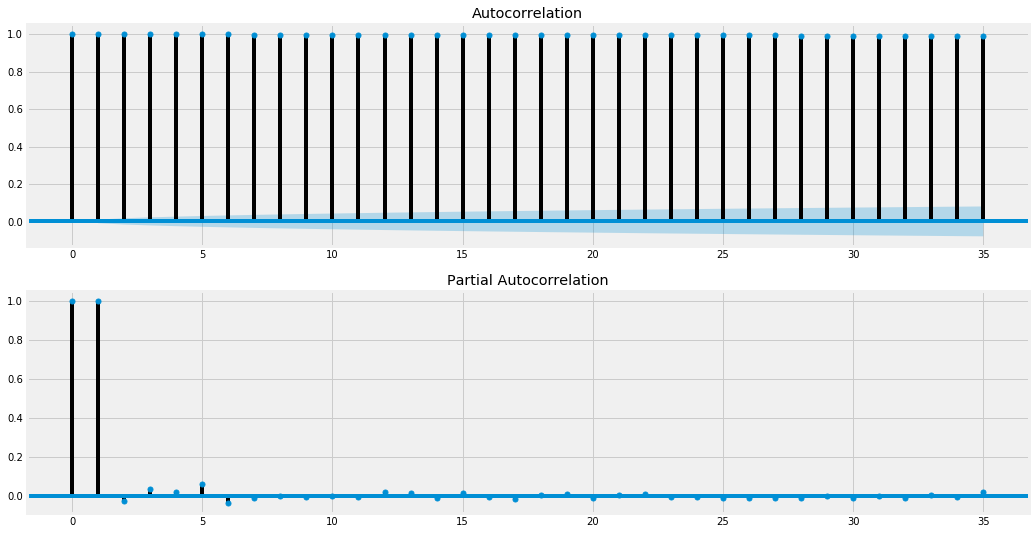

In [74]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_4["CSCO_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_4["CSCO_LOG"], lags=35, ax=ax2)

In [75]:
#Getting the 'CSCO_LOG' column values as array with dropping NaN values
array_4 = (df_4["CSCO_LOG"].dropna().as_matrix())

In [76]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'AAPL_LOG' column current row and previous row
df_4["CSCO_LOG_DIFF"] = df_4["CSCO_LOG"] - df_4["CSCO_LOG"].shift(periods=-1)

In [77]:
#Creating ARMA Model
model_4 = sm.tsa.ARMA(array_4,(2,0)).fit()
print(model_4.params) #Prints model parameter

[ 3.47397886  1.01601739 -0.01625466]


In [78]:
#Printing Model's AIC, BIC and HQIC values
print(model_4.aic, model_4.bic, model_4.hqic)

-486880.25855595124 -486845.74737916986 -486869.35077464464


In [79]:
#Finding the best values for ARIMA model parameter
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array_4,(p,q,r)).fit()
                if(aic > model_4.aic):
                    aic = model_4.aic
                    a,b,c = p,q,r
            except:
                pass
                
print(a,b,c)

0 1 0


In [80]:
#Creating and fitting ARIMA model
model_4_arima = ARIMA(array_4,(0, 1, 0)).fit()

In [81]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model_4_arima.resid))

Durbin-Watson statistic: 1.966779468709475


In [82]:
#Predicting the values using ARIMA Model
pred_4 = model_4_arima.predict()
pred_4

array([-1.11335373e-06, -1.11335373e-06, -1.11335373e-06, ...,
       -1.11335373e-06, -1.11335373e-06, -1.11335373e-06])

# Root Mean Squared Error

In [83]:
#Printing RMSE value for the model
print(np.sqrt(mean_squared_error(pred_4,df_4["CSCO_LOG_DIFF"][:-1])))

0.0006633386741929458


# 5. NASDAQ.EBAY

In [84]:
df_5 = df.copy() #Makes a copy of df dataframe.

In [85]:
#Creating a column 'EBAY_LOG' with the log values of 'NASDAQ.EBAY' column data
df_5["EBAY_LOG"] = df_5["NASDAQ.EBAY"].apply(lambda x:np.log(x))

In [86]:
df_5.head() #Returns the first 5 rows of df_5 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,EBAY_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.508481
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.508406
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.508855
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.506608
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.508556


In [87]:
type(df_5["DATE"][0]) #Type of the 'DATE' column

numpy.int64

In [88]:
#Creating a new column 'DATE_NEW' with formatted timestamp 
df_5["DATE_NEW"] = df_5["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [89]:
df_5.head() #Returns the first 5 rows of df_5 dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,EBAY_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.508481,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.508406,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.508855,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.506608,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.508556,2017-04-03 19:04:00


In [90]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df_5["EBAY_LOG"]))

Durbin-Watson statistic: 3.5208792726754005e-08


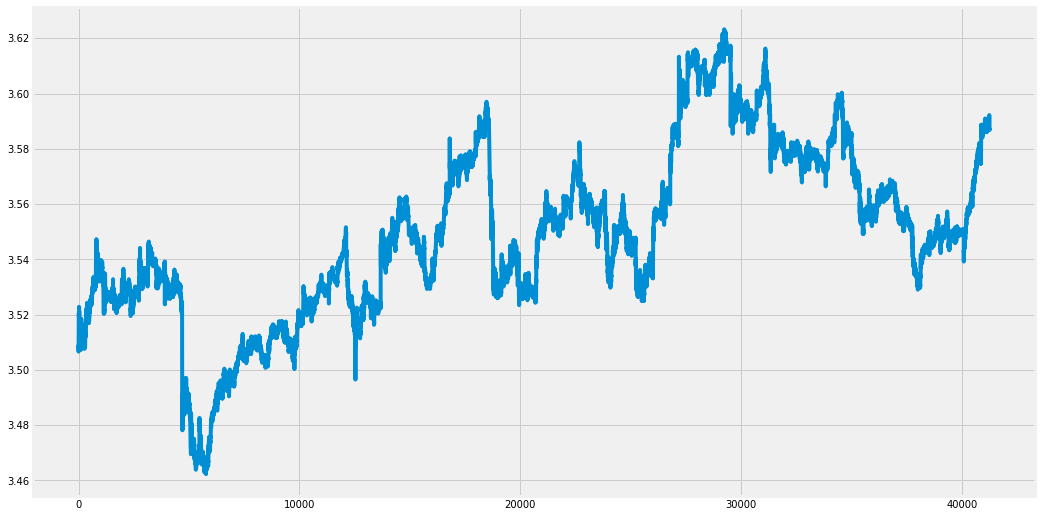

In [91]:
#Series Plot
df_5["EBAY_LOG"].plot(figsize=(16,9))
plt.show()

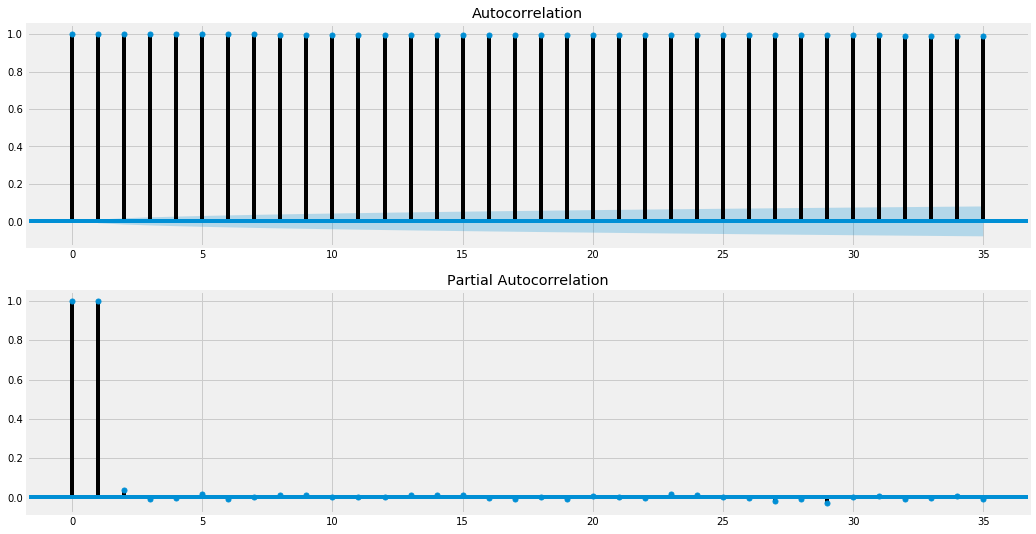

In [96]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_5["EBAY_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_5["EBAY_LOG"], lags=35, ax=ax2)

In [94]:
#Getting the 'EBAY_LOG' column values as array with dropping NaN values
array_5 = (df_5["EBAY_LOG"].dropna().as_matrix())

In [95]:
#Creating a column 'EBAY_LOG_DIFF' with data as difference of 'EBAY_LOG' column row and previous row
df_5["EBAY_LOG_DIFF"] = df_5["EBAY_LOG"] - df_5["EBAY_LOG"].shift(periods=-1)

In [97]:
#Creating ARMA Model
model_5 = sm.tsa.ARMA(array_5,(2,0)).fit()
print(model_5.params) #Prints model parameter

[3.54872673 0.95983186 0.03996744]


In [98]:
#Printing Model's AIC, BIC and HQIC values
print(model_5.aic, model_5.bic, model_5.hqic)

-486608.4996382867 -486573.98846150533 -486597.5918569801


In [99]:
#Finding the best values for ARIMA model parameter
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array_5,(p,q,r)).fit()
                if(aic > model_5.aic):
                    aic = model_5.aic
                    a,b,c = p,q,r
            except:
                pass
                
print(a,b,c)

C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Jee\Misc\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0


In [100]:
#Creating and fitting ARIMA model
model_5_arima = ARIMA(array_5,(0, 1, 0)).fit()

In [101]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2. 
#Prints Durbin-Watson statistic of given data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model_5_arima.resid))

Durbin-Watson statistic: 2.0801606898778635


In [102]:
#Predicting the values using ARIMA Model
pred_5 = model_5_arima.predict()
pred_5

array([1.90575808e-06, 1.90575808e-06, 1.90575808e-06, ...,
       1.90575808e-06, 1.90575808e-06, 1.90575808e-06])

# Root Mean Squared Error

In [103]:
#Printing RMSE value for the model
print(np.sqrt(mean_squared_error(pred_5,df_5["EBAY_LOG_DIFF"][:-1])))

0.0006659697471258496
